In [1]:
import json
from privacypacking.utils.utils import load_logs, global_metrics
import pandas as pd

In [8]:
import plotly.express as px

In [13]:
names = [
    "0811-135355",
    "0811-135407",
    "0811-135417",
    "0811-135430",
    "0811-135445",
    "0811-135610",
]
metrics = []
for name in names:
    metrics.append(global_metrics(load_logs(f"offline/Simplex/{name}.json")))
df = pd.DataFrame(metrics)

In [14]:
df

,scheduler,n_allocated_tasks,realized_profit,n_tasks,maximum_profit,scheduling_time
0,Simplex,29,69,30,70,0.050574
1,Simplex,57,137,60,140,0.095870
2,Simplex,105,261,120,280,0.384432
3,Simplex,145,372,180,420,0.636827
4,Simplex,184,482,240,560,69.988117
5,Simplex,215,578,300,700,5118.309847


### Setup

- 10 blocks
- Mix of Laplace, Gaussian, Subsampled gaussian 

```yaml
  tasks_spec:
    curve_distributions:
      laplace:
        num: 100
        num_blocks: 3
        noise_start: 0.1
        noise_stop: 5
      gaussian:
        num: 100
        num_blocks: 4
        sigma_start: 1
        sigma_stop: 5
      SubsampledGaussian:
        num: 100
        num_blocks: 5
        sigma_start: 1
        sigma_stop: 5
        dataset_size: 60_000
        batch_size: 64
        epochs: 10
```

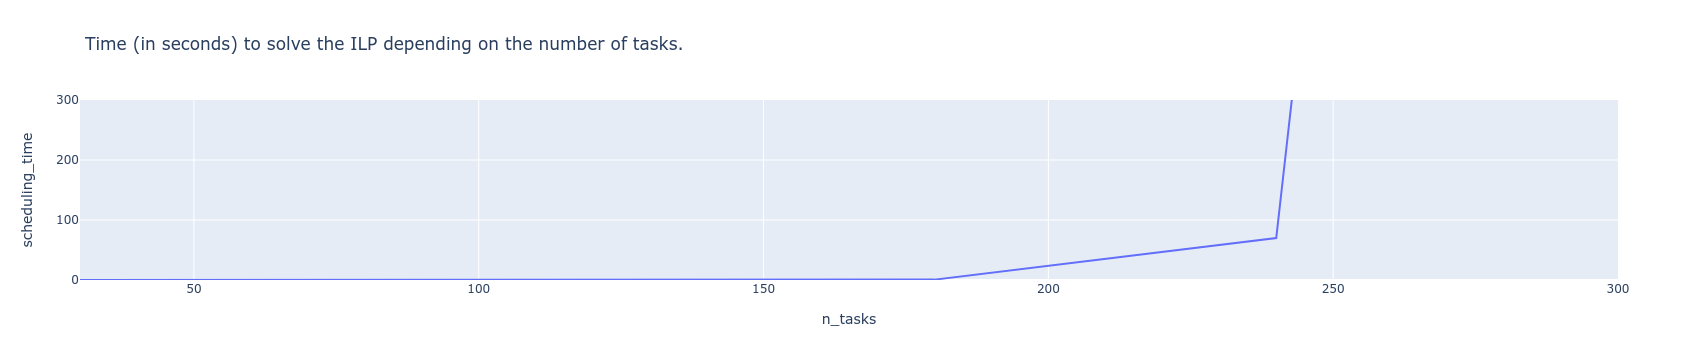

In [19]:
px.line(df, x="n_tasks", y="scheduling_time", title="Time (in seconds) to solve the ILP depending on the number of tasks.", range_y=[0,300])